Airline data is analyzed using graph as follows:  

Which airports are central i.e have shorter connection to other airports and which are in the periphery/ are connected to other  airports through longer connections ?  
Which airports are well connected to other airports and which are least connected ??
What is the shortest distance between two most busy airports ?



In [1]:
import networkx as nx

In [2]:
import pickle

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from networkx.algorithms.distance_measures import eccentricity, radius , diameter , center

In [7]:
from networkx.algorithms.shortest_paths.generic import all_shortest_paths , shortest_path_length

In [8]:
data = pd.read_csv("data.csv")

In [9]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [10]:
data.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
49995,2008,1,18,5,1206.0,1200,1713.0,1705,172.0,LAX,HOU,1390
49996,2008,1,18,5,807.0,810,1306.0,1315,170.0,LAX,HOU,1390
49997,2008,1,18,5,1834.0,1815,1933.0,1920,45.0,LAX,LAS,236
49998,2008,1,18,5,725.0,725,821.0,825,42.0,LAX,LAS,236
49999,2008,1,18,5,1507.0,1500,1610.0,1605,48.0,LAX,LAS,236


In [11]:
data.shape

(50000, 12)

In [30]:
## Mean airtime and  distance between two airports 
grouped_file = data.groupby(['Origin', 'Dest']).agg({"AirTime" : 'mean' , 'Distance': 'mean', 'DayofMonth' : 'size'}).reset_index()
grouped_file.rename({'DayofMonth': 'NoOfFlights'}, inplace = True, axis = 1)
grouped_file

,Origin,Dest,AirTime,Distance,NoOfFlights
0,ABQ,AMA,40.266667,277,15
1,ABQ,BWI,189.142857,1670,15
2,ABQ,DAL,77.500000,580,130
3,ABQ,DEN,55.886364,349,45
4,ABQ,ELP,37.804878,223,41
...,...,...,...,...,...
817,TUS,LAS,61.556818,365,88
818,TUS,LAX,75.000000,451,84
819,TUS,MDW,169.433333,1440,30
820,TUS,OAK,119.333333,747,15


In [31]:
grouped_file['AirTime'] = np.round(grouped_file['AirTime'],2)

In [32]:
grouped_file

,Origin,Dest,AirTime,Distance,NoOfFlights
0,ABQ,AMA,40.27,277,15
1,ABQ,BWI,189.14,1670,15
2,ABQ,DAL,77.50,580,130
3,ABQ,DEN,55.89,349,45
4,ABQ,ELP,37.80,223,41
...,...,...,...,...,...
817,TUS,LAS,61.56,365,88
818,TUS,LAX,75.00,451,84
819,TUS,MDW,169.43,1440,30
820,TUS,OAK,119.33,747,15


In [33]:
## create the graph 
summed_graph = nx.from_pandas_edgelist(grouped_file, source='Origin', target='Dest', edge_attr=True, create_using = nx.DiGraph())
##
print(list(summed_graph.edges(data = True))[:5])
print("\n")
print("No of nodes and edges : {0} , {1}".format(summed_graph.order() , summed_graph.size()))  ## No of aiports and Number of flights 

[('ABQ', 'AMA', {'AirTime': 40.27, 'Distance': 277, 'NoOfFlights': 15}), ('ABQ', 'BWI', {'AirTime': 189.14, 'Distance': 1670, 'NoOfFlights': 15}), ('ABQ', 'DAL', {'AirTime': 77.5, 'Distance': 580, 'NoOfFlights': 130}), ('ABQ', 'DEN', {'AirTime': 55.89, 'Distance': 349, 'NoOfFlights': 45}), ('ABQ', 'ELP', {'AirTime': 37.8, 'Distance': 223, 'NoOfFlights': 41})]


No of nodes and edges : 64 , 822


In [34]:
# Dump graph
with open("airline_graph.p", 'wb') as f:
    pickle.dump(summed_graph, f)

In [35]:
# Load graph
with open("airline_graph.p", 'rb') as f:  
    G_loaded = pickle.load(f)
##
print("No of nodes and edges : {0} , {1}".format(G_loaded.order() , G_loaded.size()))  ## No of aiports and Number of flights 

No of nodes and edges : 64 , 822


In [36]:
degree_list = list(summed_graph.degree())
## Aiport having the most connections 

max_connections_airports = sorted(degree_list , key = lambda x : x[1] , reverse = True)[0:10]
max_connections_airports

[('LAS', 108),
 ('MDW', 94),
 ('PHX', 84),
 ('BWI', 76),
 ('MCO', 66),
 ('TPA', 62),
 ('HOU', 58),
 ('BNA', 54),
 ('ABQ', 44),
 ('STL', 44)]

In [37]:
max_connections_nodes = [a for a,d in max_connections_airports]
max_connections_nodes

['LAS', 'MDW', 'PHX', 'BWI', 'MCO', 'TPA', 'HOU', 'BNA', 'ABQ', 'STL']

In [38]:
## Airport  with least connections 
least_connections_airports = sorted(degree_list , key = lambda x : x[1] )[0:10]
least_connections_airports

[('CRP', 2),
 ('HRL', 6),
 ('AMA', 8),
 ('JAN', 8),
 ('PBI', 8),
 ('IAD', 8),
 ('OMA', 8),
 ('SFO', 8),
 ('LBB', 10),
 ('MAF', 10)]

In [39]:
least_connections_nodes = [a for a,d in least_connections_airports]
least_connections_nodes

['CRP', 'HRL', 'AMA', 'JAN', 'PBI', 'IAD', 'OMA', 'SFO', 'LBB', 'MAF']

In [40]:
ns = [d for n,d in list(summed_graph.degree())]

In [41]:
ns = np.array(ns)
ns = ns*20
ns

array([ 880,  160, 1520,  600,  640,  400, 1160, 2160,  720,  200,  200,
        800, 1320, 1880,  800,  480, 1680,  680,  560,  560,  880, 1240,
        240,  200,  640, 1080,  120,  240,  520,  360,  440,  320,  240,
        360,  240,  480,  240,  640,  360,  320,  520,  280,  240,  440,
        240,  200,  440,  440,  320,  320,  160,  280,  280,  320,  240,
        160,  280,  200,   40,  240,  160,  160,  160,  200])

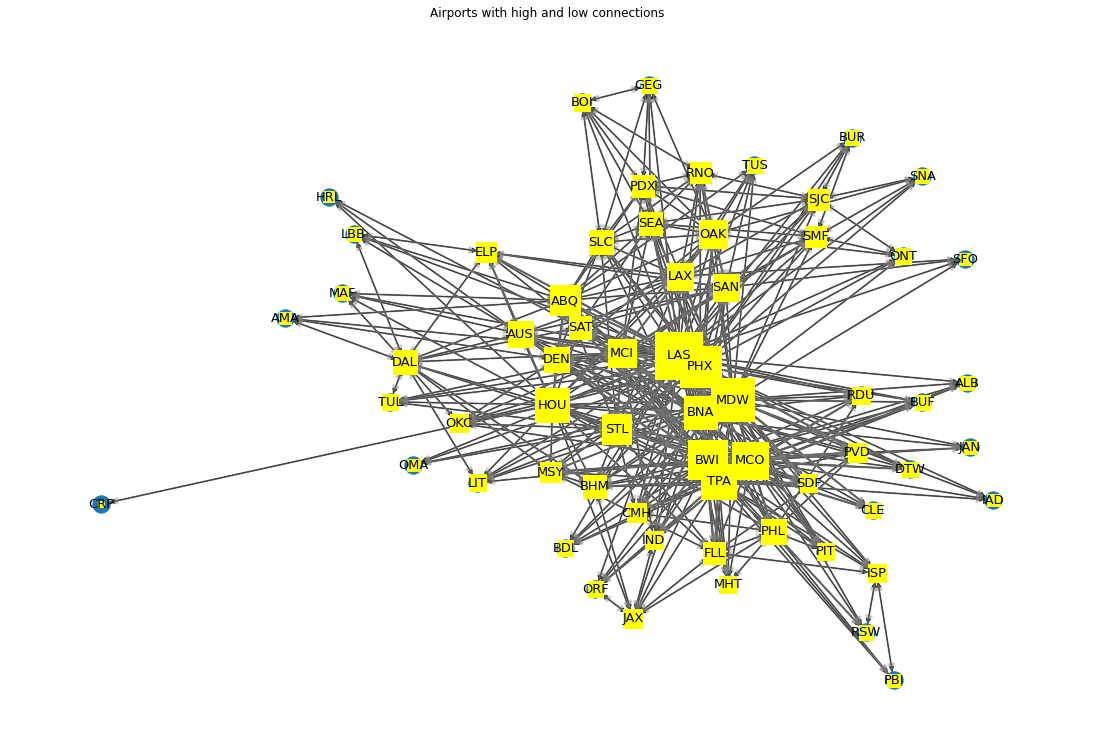

In [42]:
## plot the max and least connections airports 

plt.figure(figsize = (15,10))
circ_pos = nx.spring_layout(summed_graph ,  seed = 21) 

#Use the networkx draw function to easily visualise the graph
nx.draw(summed_graph,circ_pos)

#highlight the central airports and those in periphery 
nx.draw_networkx_nodes(summed_graph, circ_pos,  alpha=1, node_shape = 's', node_size = ns, node_color = 'yellow')

#nx.draw_networkx_nodes(summed_graph, circ_pos, nodelist= max_connections_nodes, node_color='orange', alpha=1, node_shape = 's')
#nx.draw_networkx_nodes(summed_graph, circ_pos, nodelist= least_connections_nodes, node_color='purple', alpha=1, node_shape = 's')

# edges
nx.draw_networkx_edges(summed_graph,circ_pos,
                       edgelist=summed_graph.edges(),
                       width=2,alpha=0.3,edge_color='grey', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in summed_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(summed_graph, circ_pos,node_name,font_size=13, node_shape = 's', node_size = ns)
plt.title("Airports with high and low connections")
## edge labels 
#nx.draw_networkx_edge_labels(summed_graph,circ_pos,font_size=16, edge_labels = nx.get_edge_attributes(summed_graph,'Distance'))
plt.show()


In [43]:
nx.periphery(summed_graph) ## Airports that are maximum connections away from other airports

['AMA',
 'DAL',
 'ELP',
 'LAX',
 'LBB',
 'MAF',
 'MCI',
 'OAK',
 'PDX',
 'SEA',
 'SLC',
 'TUS',
 'ALB',
 'HRL',
 'BDL',
 'JAX',
 'SDF',
 'CLE',
 'CMH',
 'DTW',
 'FLL',
 'ONT',
 'PVD',
 'RDU',
 'BOI',
 'GEG',
 'RNO',
 'BUF',
 'BUR',
 'SJC',
 'SMF',
 'IND',
 'ISP',
 'JAN',
 'MHT',
 'ORF',
 'PBI',
 'PIT',
 'RSW',
 'CRP',
 'TUL',
 'IAD',
 'OMA',
 'SFO',
 'SNA']

In [44]:
print("Diameter :{}".format(nx.diameter(summed_graph)))

Diameter :3


In [45]:
print("Radius :{}".format(nx.radius(summed_graph)))

Radius :2


In [46]:
periphery_airports = nx.periphery(summed_graph)
len(periphery_airports)

45

In [47]:
center_airports = nx.center(summed_graph)
len(center_airports)

19

In [48]:
## dijkstra shortest path
from networkx.algorithms.shortest_paths.weighted import dijkstra_path , dijkstra_path_length
print(dijkstra_path(summed_graph, 'PIT', 'TUL', weight = 'Distance'))

['PIT', 'MDW', 'STL', 'TUL']


In [49]:
## dijkstra shortest path
print(dijkstra_path_length(summed_graph, 'PIT', 'TUL', weight = 'Distance'))

1004


In [50]:
## Shortest distance between two busiest airports 
print(dijkstra_path_length(summed_graph, 'LAS', 'MDW', weight = 'Distance'))

1521


In [51]:
## Shortest distance between two aiports 
dict(nx.shortest_path_length(summed_graph , weight = 'Distance')) 


{'ABQ': {'ABQ': 0,
  'ELP': 223,
  'AMA': 277,
  'LBB': 289,
  'TUS': 321,
  'PHX': 328,
  'MAF': 332,
  'DEN': 349,
  'LAS': 487,
  'SLC': 493,
  'DAL': 580,
  'AUS': 626,
  'SAN': 628,
  'ONT': 653,
  'SNA': 666,
  'LAX': 677,
  'BUR': 697,
  'MCI': 718,
  'SAT': 719,
  'HOU': 759,
  'OKC': 761,
  'BOI': 784,
  'TUL': 817,
  'RNO': 832,
  'SJC': 873,
  'LIT': 876,
  'SMF': 884,
  'OAK': 889,
  'HRL': 899,
  'SFO': 901,
  'STL': 934,
  'CRP': 946,
  'MSY': 1017,
  'GEG': 1039,
  'PDX': 1111,
  'JAN': 1118,
  'MDW': 1121,
  'BHM': 1167,
  'IND': 1169,
  'SEA': 1180,
  'SDF': 1188,
  'BNA': 1209,
  'OMA': 1276,
  'CMH': 1344,
  'DTW': 1350,
  'CLE': 1421,
  'TPA': 1497,
  'PIT': 1523,
  'JAX': 1532,
  'MCO': 1552,
  'BUF': 1589,
  'RDU': 1652,
  'BWI': 1670,
  'PBI': 1671,
  'RSW': 1685,
  'FLL': 1690,
  'IAD': 1698,
  'PHL': 1749,
  'ORF': 1825,
  'ALB': 1838,
  'ISP': 1886,
  'BDL': 1898,
  'MHT': 1959,
  'PVD': 1963},
 'AMA': {'AMA': 0,
  'ABQ': 277,
  'DAL': 324,
  'DEN': 358,
  'EL

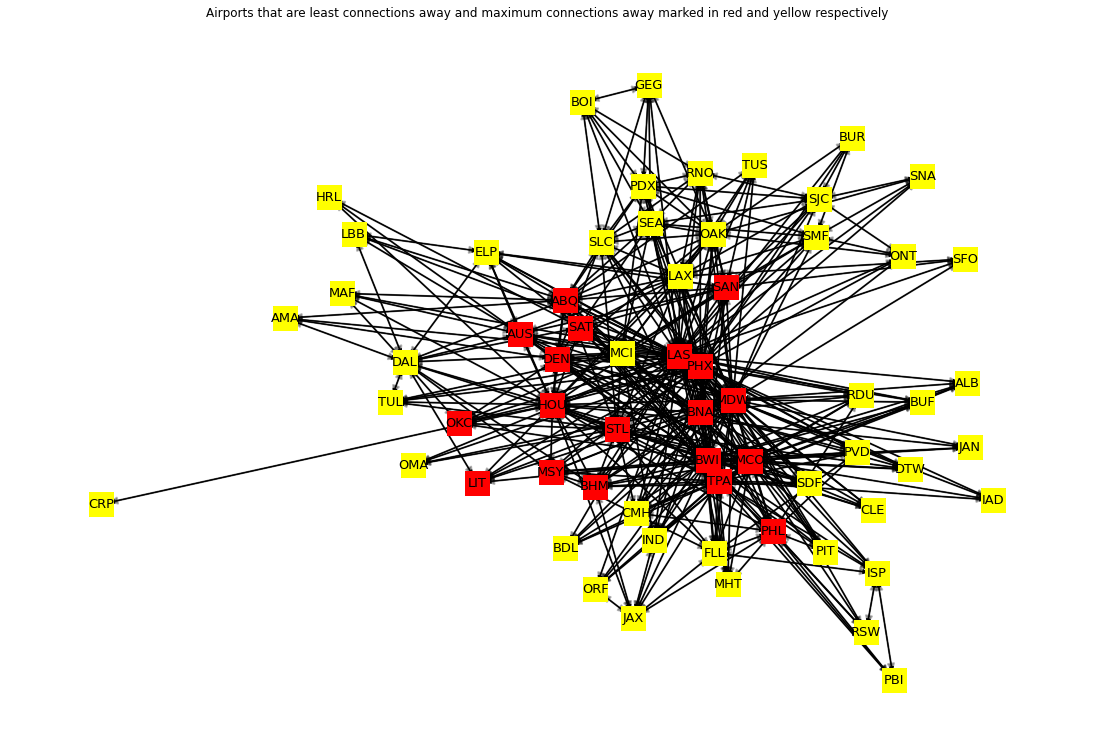

In [52]:
plt.figure(figsize = (15,10))
circ_pos = nx.spring_layout(summed_graph ,  seed = 21) 

#Use the networkx draw function to easily visualise the graph
nx.draw(summed_graph,circ_pos)

#highlight the central airports and those in periphery 
nx.draw_networkx_nodes(summed_graph, circ_pos,  alpha=1, node_shape = 's', node_size = 600)

nx.draw_networkx_nodes(summed_graph, circ_pos, nodelist= center_airports, node_color='red', alpha=1, node_shape = 's', node_size = 600)
nx.draw_networkx_nodes(summed_graph, circ_pos, nodelist= periphery_airports, node_color='yellow', alpha=1, node_shape = 's', node_size = 600)

# edges
nx.draw_networkx_edges(summed_graph,circ_pos,
                       edgelist=summed_graph.edges(),
                       width=2,alpha=0.3,edge_color='black', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in summed_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(summed_graph, circ_pos,node_name,font_size=13, node_shape = 's', node_size = 600)
plt.title("Airports that are least connections away and maximum connections away marked in red and yellow respectively")
## edge labels 
#nx.draw_networkx_edge_labels(summed_graph,circ_pos,font_size=16, edge_labels = nx.get_edge_attributes(summed_graph,'Distance'))
plt.show()

In [53]:
density = nx.density(summed_graph)

print('The edge density is: ' + str(density)) ## edges/nodes(nodes -1)

The edge density is: 0.20386904761904762


In [54]:
%time bet_cen = nx.betweenness_centrality(summed_graph)
##
%time clo_cen = nx.closeness_centrality(summed_graph)
##
##
%time eig_cen = nx.eigenvector_centrality(summed_graph)

CPU times: user 30.1 ms, sys: 1.47 ms, total: 31.5 ms
Wall time: 41.5 ms
CPU times: user 38.1 ms, sys: 1.04 ms, total: 39.2 ms
Wall time: 46.4 ms
CPU times: user 4.56 ms, sys: 186 µs, total: 4.75 ms
Wall time: 6 ms


In [55]:
def get_top_keys(dictionary , top):
    #items = dictionary.items()
    items = sorted(dictionary.items() , reverse = True , key = lambda item: item[1])
    val = map(lambda x: x[0], items[:top])
    return items[:11]

In [56]:
top_bet_cen = get_top_keys(bet_cen , 10)
top_clo_cen = get_top_keys(clo_cen , 10)
top_eig_cen = get_top_keys(eig_cen , 10)

In [57]:
print("Top 10 Betweenness Centrality :")
for n in top_bet_cen:
    print(n[0])
    

Top 10 Betweenness Centrality :
LAS
MDW
PHX
HOU
BWI
MCO
TPA
BNA
ABQ
STL
OAK


In [58]:
print("Top 10 Closeness Centrality :")
for n in top_clo_cen:
    print(n[0])

Top 10 Closeness Centrality :
LAS
MDW
PHX
BWI
MCO
TPA
HOU
BNA
ABQ
STL
OAK


In [59]:
print("Top 10 Eigenvector Centrality :")
for n in top_eig_cen:
    print(n[0])

Top 10 Eigenvector Centrality :
LAS
MDW
PHX
BWI
MCO
TPA
HOU
BNA
ABQ
STL
MCI


In [60]:
print("Avg clustering : {}".format(nx.average_clustering(summed_graph) )) 

Avg clustering : 0.6656328632394829
